In [23]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1 – Net Force with Quadratic Drag

The drag force is given by:

$$F_d = - k_2 v |v|$$

At **terminal velocity** $v_t$, the drag balances the gravitational force:

$$|F_g| = mg = |F_d| = k_2 v_t^2$$

Solving for $v_t$:

$$v_t = \sqrt{\frac{mg}{k_2}}$$


We can now express the drag force in terms of $v_t$:


$$F_d = - \left(\frac{mg}{v_t^2}\right)v|v|$$


Thus, the **net force** on the object is:

$$F = F_g + F_d = - mg \left[ 1 + \left(\frac{v|v|}{v_t^2}\right) \right]$$



In [24]:
# 1.2 (solve 1D Newtonian EOM for (constant) free fall and quadratic drag numerically)
class particle:

    def __init__(self, t=0.0, m=1.0, y=0.0, v=0.0): # particle with attributes time, mass, position, and velocity (SI units)
        self.t = t
        self.m = m
        self.y = y
        self.v = v
        
    def forward_euler(self, F, dt): # forward Euler step to update particle attributes given general force function F(t,m,y,v) and timestep dt
        self.v = self.v + (F(self.t, self.m, self.y, self.v)/self.m)*dt # v_(i+1) = v_i + a_i*dt
        self.y = self.y + self.v*dt # y_(i+1) = y_i + v_i*dt
        self.t = self.t + dt # t_(i+1) = t_i + dt

def forward_euler_solver(F, t_0, m_0, y_0, v_0, dt): # executes forward Euler method given force, initial conditions, and timestep
    p = particle(t_0, m_0, y_0, v_0) # create particle instance with initial conditions
    ts, ys, vs = [p.t], [p.y], [p.v] # lists to store time, position, velocity values at each timestep
    while p.y > 0: # while loop terminates when pebble hits the ground (y=<0)
        p.forward_euler(F, dt)
        ts.append(p.t)
        ys.append(p.y)
        vs.append(p.v)
    return np.array(ts), np.array(ys), np.array(vs)

# constants, initial conditions and timestep
g = 9.8
v_t = 30
t_0 = 0
m_0 = 0.01 
y_0 = 50
v_0 = 0
dt = 0.00001

F_gc = lambda t, m, y, v: - m*g # (constant) free fall force (lambda function of t, m, y, v)
F_quad = lambda t, m, y, v: - m*g*(1+(v*abs(v) /v_t**2)) # quadratic drag force

vf_gc = abs(forward_euler_solver(F_gc, t_0, m_0, y_0, v_0, dt)[2][-1]) 
vf_quad = abs(forward_euler_solver(F_quad, t_0, m_0, y_0, v_0, dt)[2][-1])

print(f'The impact speed of the pebble released from height {y_0} m (free fall) is ~ {vf_gc} m/s')
print(f'The impact speed of the pebble released from height {y_0} m (quadratic drag) is ~ {vf_quad} m/s')

'''vf_quad < vf_gc, as expected'''

The impact speed of the pebble released from height 50 m (free fall) is ~ 31.304924000168914 m/s
The impact speed of the pebble released from height 50 m (quadratic drag) is ~ 24.434994677335023 m/s


'vf_quad < vf_gc, as expected'

### 1.3 - Analytic Result
The EOM can be solved analytically:

$$ v = - v_t \tanh \left(\frac{gt}{v_t}+v_0 \right) = - v_t \tanh \left(\frac{gt}{v_t}\right) $$
$$ y = y_0 - \frac{v_t^2}{g} \ln \left[\cosh \left(\frac{gt}{v_t} \right) \right]

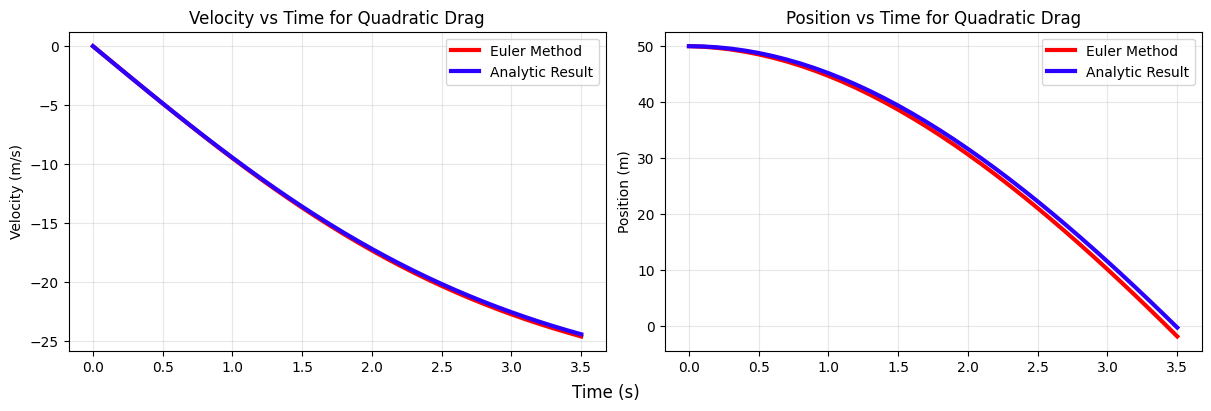

In [ ]:
# 1.3 (numeric vs analytic result)
ts, ys_euler, vs_euler = forward_euler_solver(F_quad, t_0, m_0, y_0, v_0, dt=0.1) # set larger time step dt = 0.1 s (to see deviations)
# analytic results for velocity and position (at same time steps as forward Euler method)
vs = -v_t * np.tanh(g*ts/v_t) 
ys = y_0 - (v_t**2/g)*np.log(np.cosh(g*ts/v_t)) 

fig, axs = plt.subplots(1, 2, figsize=(12,4), sharex=True, constrained_layout=True) # fig = entire figure ((width, height) = 12 x 4), axs = 1 x 2 array of empty subplots, shared x-axis (time)
fig.supxlabel('Time (s)') # common x-label for all subplots
common = {'ls':'-', 'lw':3} # common kwargs (key word arguments) for all plots (dictionary)
colors = ["#FF0000", "#2B00FF"] # list of colors for plots 

pairs = [(vs_euler, vs), (ys_euler, ys)] # list of (y1, y2) pairs for each subplot
ylabels = ["Velocity (m/s)", "Position (m)"] # list of y-labels for each subplot
titles  = ["Velocity vs Time for Quadratic Drag", "Position vs Time for Quadratic Drag"] # list of titles for each subplot
leg = ["Euler Method", "Analytic Result"] # legend labels for y1 and y2

for ax, (y1, y2), ylabel, title in zip(axs, pairs, ylabels, titles): # zip returns (axs[0], pairs[0], ylabels[0], titles[0]), (axs[1], pairs[1], ylabels[1], titles[1])
    # unpack common using dictionary unpacking
    ax.plot(ts, y1, color=colors[0], **common, label=leg[0])
    ax.plot(ts, y2, color=colors[1], **common, label=leg[1])
    ax.grid(alpha=0.3) # alpha sets transparency of grid lines (overlapping lines can be hard to see otherwise)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

In [ ]:
# 2.1 (solve 1D Newtonian EOM for non-constant free fall numerically)
# constants, initial conditions, and timestep
M = 5.97e24 
G = 6.67e-11
R = 6.37e6
t_0 = 0
m_0 = 0.01 
v_0 = 0
dt = 0.01

F_gv = lambda t, m, y, v: - G*M*m/(R+y)**2 # non-constant free fall force function

for y_0 in [50, 2*R]:
    v_f =  abs(forward_euler_solver(F_gv, t_0, m_0, y_0, v_0, dt)[2][-1])
    print(f'The impact speed of the pebble released from height {y_0} m (non-constant free fall) is ~ {abs(v_f)} m/s')

The impact speed of the pebble released from height 50 m (non-constant free fall) is ~ 31.3045478262978 m/s
The impact speed of the pebble released from height 12740000.0 m (non-constant free fall) is ~ 9129.581901526084 m/s


In [40]:
#2.2 (comparing with constant gravity)
def compare(t_0, m_0, y_0, v_0, dt):
    vs_v = forward_euler_solver(F_gv, t_0, m_0, y_0, v_0, dt)[2]
    v_f = vs_v[-1]

    for y in np.linspace(0, 2*y_0, 1000): # search over initial heights from 0 to 2*y_0 in small increments
        vs_c = forward_euler_solver(F_gc, t_0, m_0, y, v_0, dt)[2]
        v_f_c = vs_c[-1]
        if abs((v_f - v_f_c)/v_f) < .01: # impact speeds agree to within 1%
            return y

for y_0 in [50, 2*R]:
    result = compare(t_0, m_0, y_0, v_0, dt)
    print(f"For initial height {y_0:.3f} m, the height where the constant-g impact speed matches within 1% of the true value is ~{result:.3f} m")

For initial height 50.000 m, the height where the constant-g impact speed matches within 1% of the true value is ~49.149 m
For initial height 12740000.000 m, the height where the constant-g impact speed matches within 1% of the true value is ~4182902.903 m


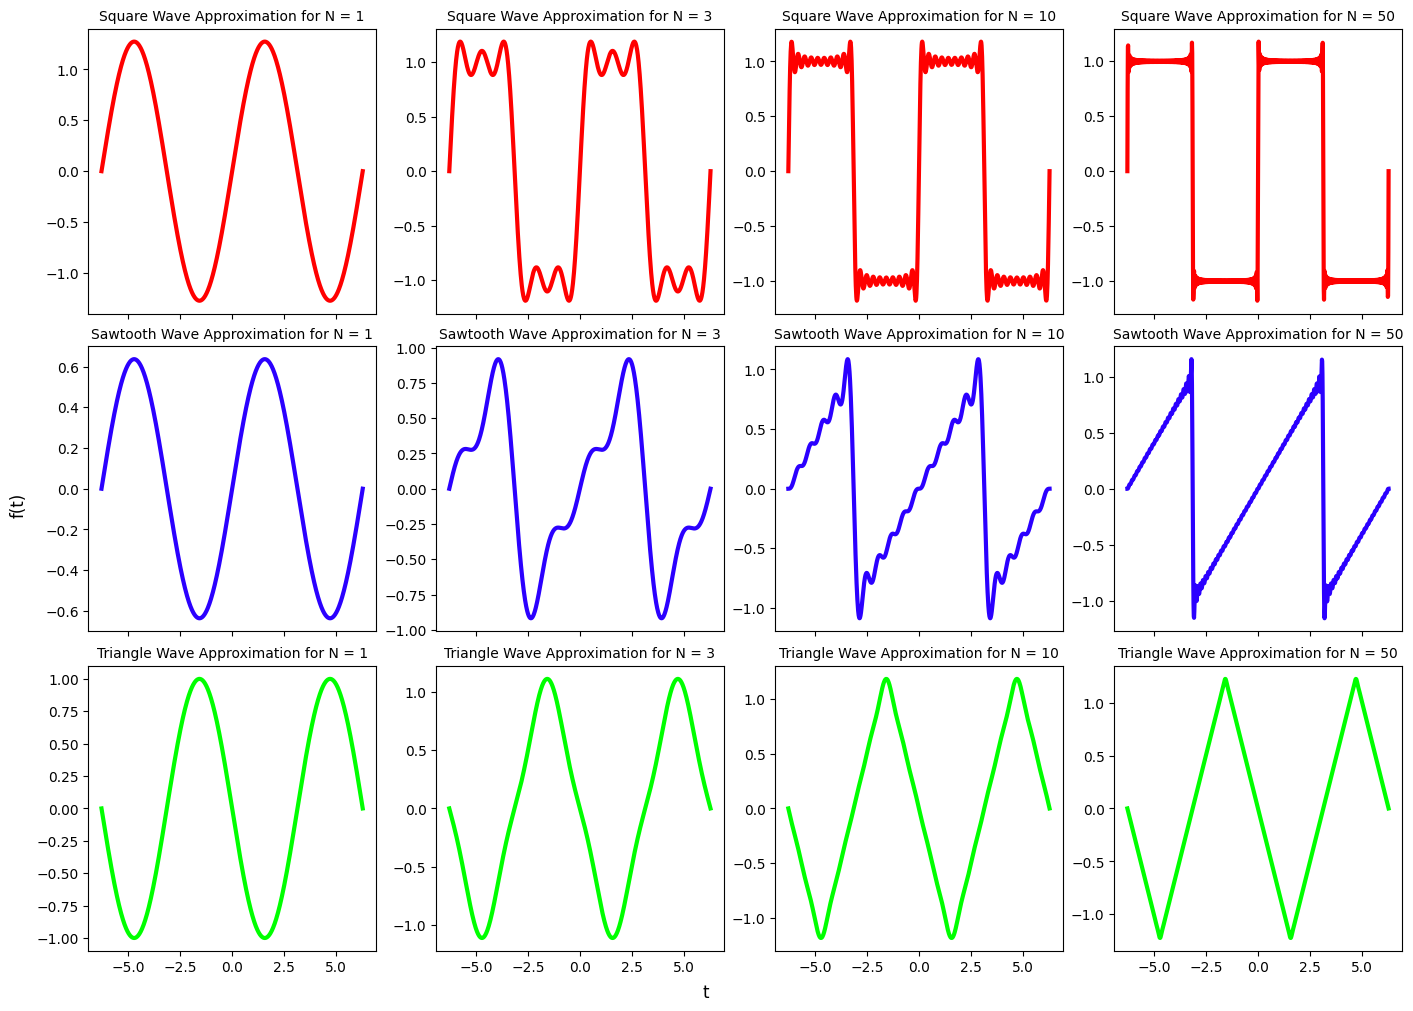

In [ ]:
#3 (fourier series approximation for square, sawtooth, and triangle wave functions)
Ns = [1,3,10,50] # number of terms to include
ts = np.linspace(-2*np.pi, 2*np.pi, 1000) 

fig, axs = plt.subplots(3, len(Ns), figsize=(14,10), sharex=True, constrained_layout=True) # row for each wave type, column for each N
fig.supxlabel('t') 
fig.supylabel('f(t)')
common = {'ls':'-', 'lw':3} # include color in common style
colors = ["#FF0000", "#2B00FF", "#00FF00"] # list of colors for plots

for idx, N in enumerate(Ns): # enumerate(Ns) gives (index, value) pairs (i.e. 0,1), (1,3), (2,10), (3,50)

    titles = [f"Square Wave Approximation for N = {N}", f"Sawtooth Wave Approximation for N = {N}", f"Triangle Wave Approximation for N = {N}"]

    y0 = np.array([(4/np.pi) * np.sin((2*n-1)*ts)/(2*n-1) for n in range(1,N+1)]) # square wave terms
    y0_sum = np.sum(y0,axis=0) # sum over terms to get approximation for given N

    y1 = np.array([(2/(n * np.pi)) * (-1)**(n+1) * np.sin(n*ts) for n in range(1,N+1)]) # sawtooth wave terms
    y1_sum = np.sum(y1,axis=0)
    
    y2 = np.array([(1/n**2) * (-1)**((n+1)//2) * np.sin(n*ts) for n in range(1,N+1) if n%2 != 0]) # triangle wave terms (only odd n, otherwise zero)
    y2_sum = np.sum(y2,axis=0)

    ysums = np.array([y0_sum,y1_sum,y2_sum])

    cols = axs[:,idx] # select column idx from axs array
    for ax, y, title, color in zip(cols, ysums, titles, colors): # zip returns (axs[0], ysums[0], titles[0], colors[0]), (axs[1], ysums[1], titles[1], colors[1]), (axs[2], ysums[2], titles[2], colors[2])
        ax.plot(ts, y, color=color, **common)
        ax.set_title(title, fontsize=10) # set font size for readability

Text(0.5, 1.0, 'Position vs Time for Damped Harmonic Oscillator (dc = 0.5)')

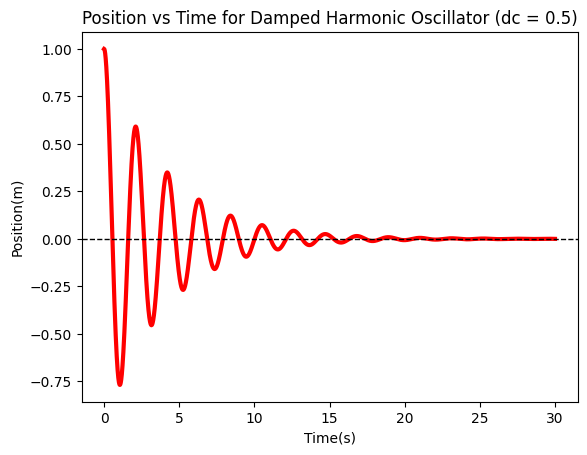

In [94]:
#4.1 (solve 1D damped harmonic oscillator EOM numerically)
class damped_harmonic_oscillator:

    def __init__(self, nf, dc, t, x, v): # DHO with attributes time, position, velocity, damping coefficient, and natural frequency (SI units)
        self.nf = nf
        self.dc = dc
        self.t = t
        self.x = x
        self.v = v
        
    def symplectic_euler(self, dt): # symplectic Euler step to update DHO attributes given timestep dt (forward Euler is unstable)
        self.v = self.v - ((self.nf**2)*self.x + self.dc*self.v)*dt # v_(i+1) = v_i + a_i*dt
        self.x = self.x + self.v*dt # x_(i+1) = x_i + v_(i+1)*dt
        self.t = self.t + dt # t_(i+1) = t_i + dt

def symplectic_euler_solver(nf, dc, t_0, x_0, v_0, dt, T): # executes symplectic Euler method given initial conditions, timestep, and runtime
    dho = damped_harmonic_oscillator(nf, dc, t_0, x_0, v_0) # create DHO instance with initial conditions
    ts, xs = [dho.t], [dho.x] # lists to store time, position values at each timestep
    while dho.t < T: # while loop terminates when time reaches T 
        dho.symplectic_euler(dt)
        ts.append(dho.t)
        xs.append(dho.x)
    return np.array(ts), np.array(xs)

# constants, initial conditions, timestep, and run time  
nf = 3 
dc = 0.5  
t_0 = 0
x_0 = 1
v_0 = 0
dt = 0.00001
T = 30

ts, xs_euler = symplectic_euler_solver(nf, dc, t_0, x_0, v_0, dt, T) 
plt.plot(ts, xs_euler, color="#FF0000", ls='-', lw=3)
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.axhline(0, color='black', lw=1, ls='--') # horizontal line at x=0
plt.title('Position vs Time for Damped Harmonic Oscillator (dc = 0.5)')

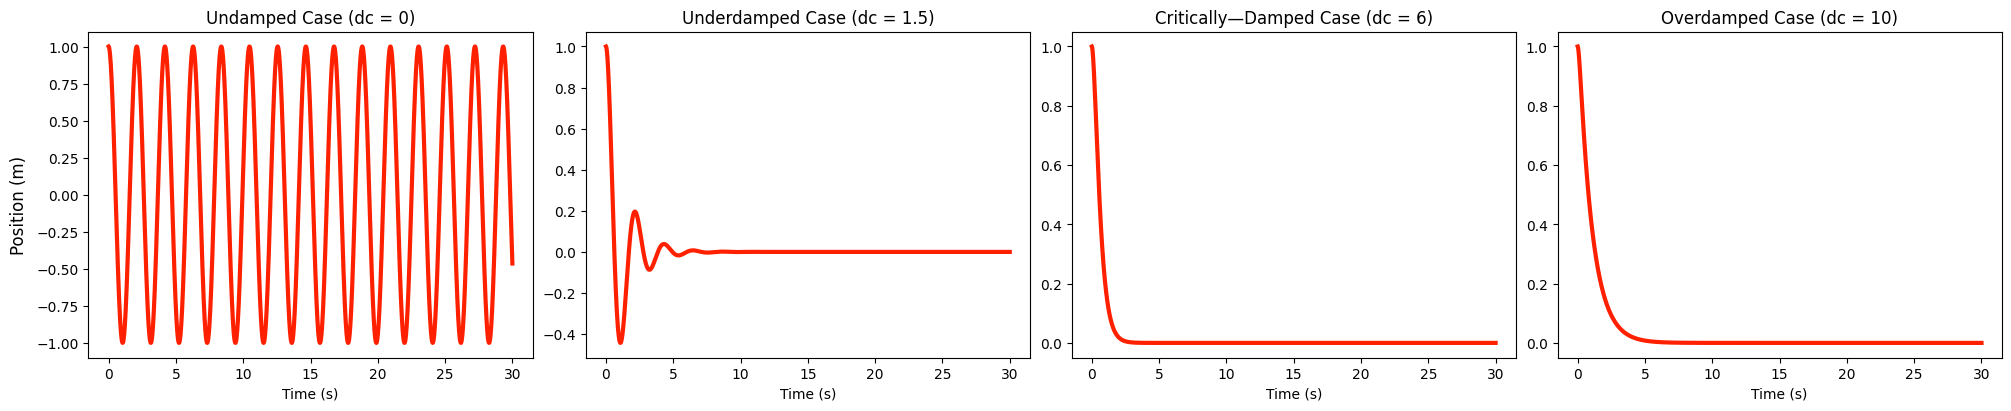

In [66]:
#4.2 (damped frequency vs natural frequency)
'From the exact solution, the damped frequency is given by df = sqrt(nf^2 - (dc^2)/4), so the larger the damping coefficient, the smaller the damped frequency and the longer the period of oscillation. This is consistent with the numerical plots below.'

# plot x(t) for different damping coefficients
dcs = [0, 1.5, 6, 10]
# dc = 0 (undamped), system oscillates indefinitely with constant amplitude
# underdamped (dc < 2*nf = 6), system oscillates with decreasing amplitude
# critically-damped (dc = 2*nf), system returns to equilibrium as quickly as possible without oscillating
# overdamped (dc > 2*(nf)), system returns to equilibrium without oscillating, but slower than in critically damped case

fig, axs = plt.subplots(1, len(dcs), figsize=(20,4), sharex=True, constrained_layout=True) 
fig.supylabel('Position (m)')
common = {'color':'#ff2000', 'ls':'-', 'lw':3} 

for idx, dc in enumerate(dcs):
    ts, xs_euler = symplectic_euler_solver(nf, dc, t_0, x_0, v_0, dt, T)
    axs[idx].plot(ts, xs_euler, **common)
    axs[idx].set_xlabel('Time (s)')
    if dc == 0:
        axs[idx].set_title(f'Undamped Case (dc = {dc})')
    elif dc < 2 * nf:
        axs[idx].set_title(f'Underdamped Case (dc = {dc})')
    elif dc == 2*nf:
        axs[idx].set_title(f'Critically—Damped Case (dc = {dc})')
    else:
        axs[idx].set_title(f'Overdamped Case (dc = {dc})')

The pairs of damping coefficients and relaxation times are: [(0.5, 3.9999895736583673), (1, 1.9999899505120442), (2, 0.9999899244369258), (3, 0.6666566288122988), (4, 0.49998995139489455)]


'From the data, rel_time~ 2/dc which is consistent with the exact solution, since rel_time = 2/dc.'

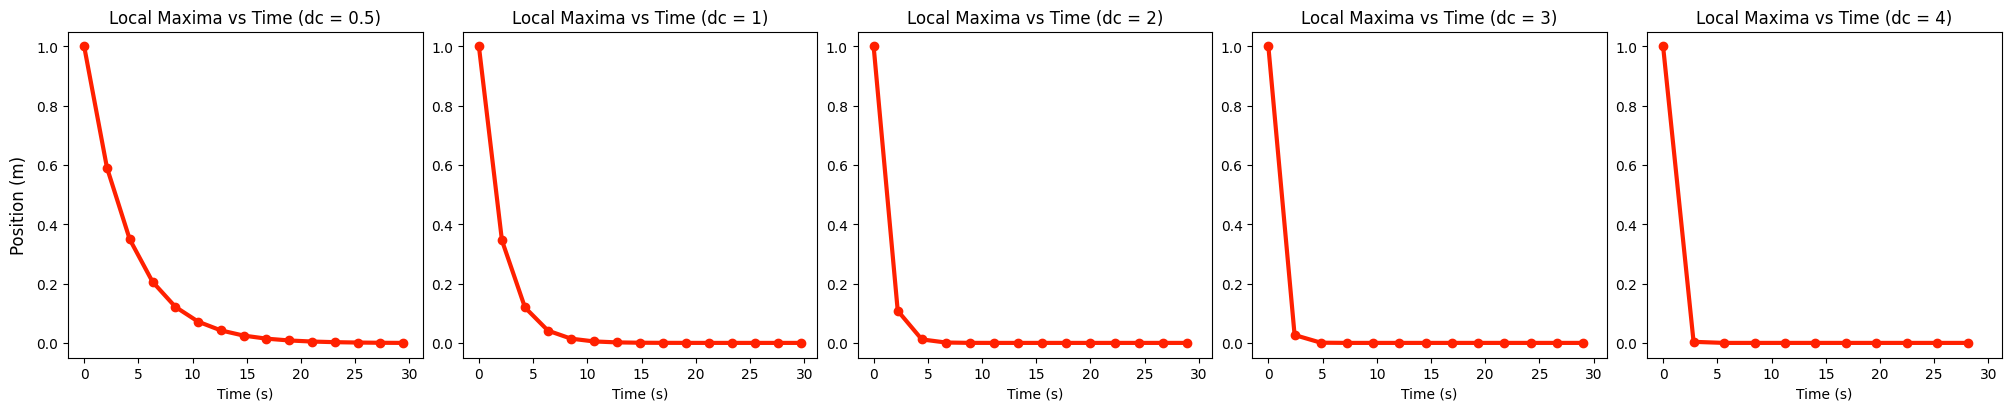

In [ ]:
#4.3 (compute relaxtion time)
def find_maxima(nf, dc, t_0, x_0, v_0, dt, T):
    ts, xs = symplectic_euler_solver(nf, dc, t_0, x_0, v_0, dt, T) 
    xs_diff = np.diff(xs) # xs_diff[i] = xs[i+1] - xs[i] (length len(xs)-1)

    # check for sign changes in the difference of adjacent x values, append i+1 (index of approx. local maxima)
    i_max = [i+1 for i in range(len(xs_diff)-1) if xs_diff[i] > 0 and xs_diff[i+1] < 0]
    # assume (t_0, x_0) is the first local maximum
    t_list = [t_0]+ [float(ts[i]) for i in i_max] 
    x_max = [x_0] + [float(xs[i]) for i in i_max] 
    return np.array(t_list), np.array(x_max)
   
def find_relaxation_times(tms,xms):
    xms = np.abs(xms) # take absolute value of maxima to avoid issues with log of negative numbers
    log_xms = np.log(xms)
    c_1 = np.polyfit(tms, log_xms, 1) # fit polynomial of degree 1 (line) to ln(xms) = c_1[0]*tms + ln(x_0)
    return float(-1/c_1[0]) # relaxation time is -1/slope of line fit to ln(xms) vs tms

# constants, initial conditions, timestep, and run time
nf = 3
t_0 = 0
x_0 = 1
v_0 = 0
dt = 0.00001
T = 30

dcs_rel_times = [] # list to store (damping coefficient, relaxation time) tuples
dcs = [0.5, 1, 2, 3, 4] # underdamped cases (dc < 2*nf = 6)

fig, axs = plt.subplots(1, len(dcs), figsize=(20,4), sharex=True, constrained_layout=True) 
fig.supylabel('Position (m)')
common = {'color':'#ff2000', 'ls':'-', 'marker':'o', 'lw':3} # '-o' sets ls = '-' and marker = 'o'

for idx, dc in enumerate(dcs):
    tms, xms = find_maxima(nf, dc, t_0, x_0, v_0, dt, T)
    axs[idx].plot(tms, xms, **common)
    axs[idx].set_xlabel('Time (s)')
    axs[idx].set_title((f'Local Maxima vs Time (dc = {dc})'))
    rel_time = find_relaxation_times(tms,xms)
    dcs_rel_times.append((dc, rel_time))  

print(f'The pairs of damping coefficients and relaxation times are: {dcs_rel_times}')

'From the data, rel_time~ 2/dc which is consistent with the exact solution, since rel_time = 2/dc.'

'As the damping coefficient k increases, the amplitude of the wave decreases more rapidly over time, indicating that the wave loses energy faster due to the increased friction. Once k is sufficiently large (e.g., k=4), the wave is overdamped so that it does not oscillate and quickly returns to equilibrium.'

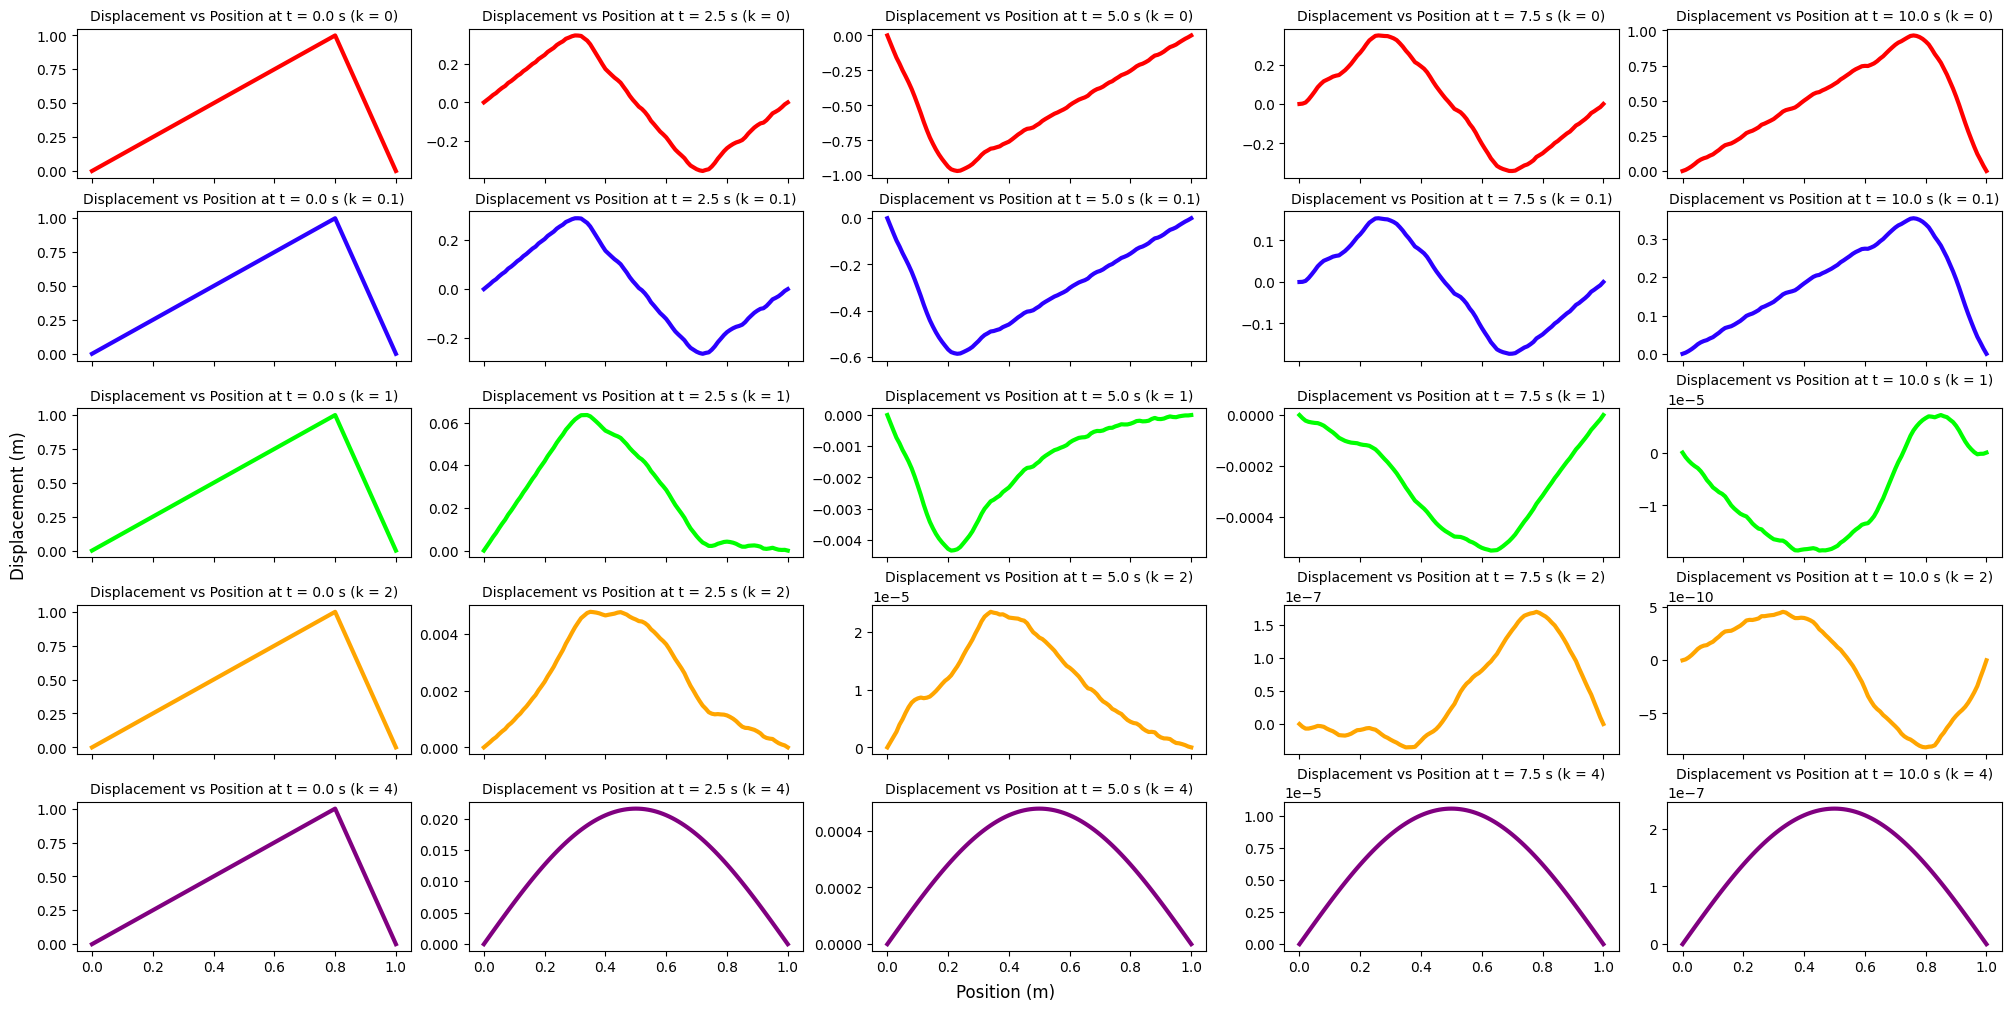

In [ ]:
#5 (# leapfrog/CTCS scheme for the 1D damped wave equation)
def solve_damped_wave_eq(lx, lt, dx, dt, k, f, g, a, b): 
    nt = int(lt/dt) + 1  # number of t points
    nx = int(lx/dx) + 1  # number of x points
    xs = np.linspace(0.0, lx, nx)  # nx x points, includes 0 and lx
    ts = np.linspace(0.0, lt, nt)  # nt t points, includes 0 and lt

    # u = u(x,t), so t-axis corresponds to rows (t increases downwards) and x-axis to columns (x increases rightwards)
    # u[j,i] = u(x_i, t_j) (initialize to zero) with j,i = 0,1,...,nt-1,nx-1 as indices for time and space
    u = np.zeros(shape=(nt,nx)) 
    r = dt/dx

    u[0, :] = np.array([f(x) for x in xs]) # initial condition u(x,0) = f(x)
    u[:, 0] = a # boundary condition u(0,t) = a
    u[:, -1] = b # boundary condition u(lx,t) = b

    for i in range(1, nx-1): # i = 1,...,nx-2
        u[1,i] = u[0,i] + dt*g(xs[i]) + (1/2)*(dt**2)*((u[0,i+1] - 2*u[0,i] + u[0,i-1])/dx**2 - 2*k*g(xs[i]))

    for j in range(1,nt-1): # leapfrog: loop over time steps starting at second time step (j=1)
        for i in range(1, nx-1):
            u[j+1, i] = (2*u[j,i] - (1 - k*dt)*u[j-1,i] + (r**2)*(u[j,i+1] - 2*u[j,i] + u[j,i-1]))/(1 + k*dt)

    return xs, ts, u

lx = 1.0 # length of string
lt = 10.0
dx = 0.01 # nx = lx/dx + 1 = 1.0/0.01 + 1 = 101
dt = 0.001 # nt = lt/dt + 1 = 10.0/0.001 + 1 = 10001 (note r = dt/dx = 0.1 <= 1.0, so the CFL condition is satisfied)
a = b = 0.0 # Dirichlet boundary conditions (fixed ends)
def f(x): # initial displacement for "plucked" string
    if 0 <= x <= 0.8*lx:
        return 1.25*x/lx
    else:
        return 5.0*(1 - x/lx)
g = lambda x: 0 # zero initial velocity

ks = [0, 0.1, 1, 2, 4] # various damping coefficients
tsnaps = 5 # number of time snapshots to plot
tindxs = [k * (len(ts) - 1) // (tsnaps - 1) for k in range(tsnaps)] # list of time indices for snapshots
fig, axs = plt.subplots(len(ks), tsnaps, figsize=(20,10), sharex=True, constrained_layout=True)  # row for each k, column for each time snapshot
fig.supxlabel('Position (m)') 
fig.supylabel('Displacement (m)')
common = {'ls':'-', 'lw':3} 
colors = ["#FF0000", "#2B00FF", "#00FF00", "#FFA500", "#800080"] # list of colors for plots

for idx, k in enumerate(ks): 
    xs, ts, u = solve_damped_wave_eq(lx, lt, dx, dt, k, f, g, a, b)
    rows = axs[idx, :] # select row idx from axs array

    for ax, tindx in zip(rows, tindxs): # zip returns (axs[idx,0], tindxs[0]), (axs[idx,1], tindxs[1]), ...
        xt = u[tindx,:]
        ax.plot(xs, xt, color=colors[idx], **common)
        ax.set_title(f"Displacement vs Position at t = {ts[tindx]} s (k = {k})", fontsize=10) # set font size for readability

'As the damping coefficient k increases, the amplitude of the wave decreases more rapidly over time, indicating that the wave loses energy faster due to the increased friction. Once k is sufficiently large (e.g., k=4), the wave is overdamped so that it does not oscillate and quickly returns to equilibrium.'